<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Crashing on first time step on the western boundary at 2 398 14 in fortran.

Going to try smoothing the restart file.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

In [2]:
restart_file = xr.open_dataset('/results2/SalishSea/nowcast-green.201905/22aug21/SalishSea_08393760_restart.nc')
restart_file

<xarray.Dataset>
Dimensions:       (t: 1, x: 398, y: 898, z: 40)
Dimensions without coordinates: t, x, y, z
Data variables: (12/47)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    kt            float64 ...
    ndastp        float64 ...
    ...            ...
    tn            (t, z, y, x) float64 ...
    sn            (t, z, y, x) float64 ...
    rotn          (t, z, y, x) float64 ...
    hdivn         (t, z, y, x) float64 ...
    sshn          (t, y, x) float64 ...
    rhop          (t, z, y, x) float64 ...
Attributes:
    file_name:  SalishSea_08393760_restart.nc
    TimeStamp:  22/08/2021 11:21:06 -0700

In [3]:
prob = 398-1
pz = 14-1

Look at velocity

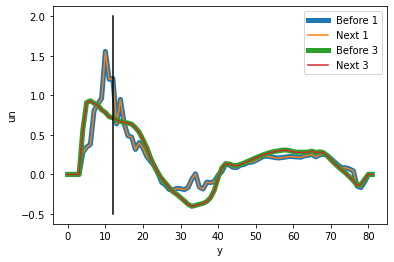

In [4]:
ib, ie = 385, 467
uveln19 = restart_file.un[0, pz]
uvelb19 = restart_file.ub[0, pz]
uvelb19[ib:ie, 1].plot(label="Before 1", linewidth=5)
uveln19[ib:ie, 1].plot(label="Next 1")
uvelb19[ib:ie, 3].plot(label="Before 3", linewidth=5)
uveln19[ib:ie, 3].plot(label="Next 3")
plt.plot([prob-ib, prob-ib], [-0.5, 2], color='k');
plt.legend();

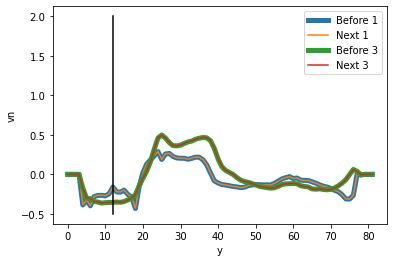

In [5]:
ib, ie = 385, 467
vveln19 = restart_file.vn[0, pz]
vvelb19 = restart_file.vb[0, pz]
vvelb19[ib:ie, 1].plot(label="Before 1", linewidth=5)
vveln19[ib:ie, 1].plot(label="Next 1")
vvelb19[ib:ie, 3].plot(label="Before 3", linewidth=5)
vveln19[ib:ie, 3].plot(label="Next 3")
plt.plot([prob-ib, prob-ib], [-0.5, 2], color='k');
plt.legend();

In [6]:
restart_file.un[0, :, :, 1] = restart_file.un[0, :, :, 2]
restart_file.ub[0, :, :, 1] = restart_file.ub[0, :, :, 2]
restart_file.vn[0, :, :, 1] = restart_file.vn[0, :, :, 2]
restart_file.vb[0, :, :, 1] = restart_file.vb[0, :, :, 2]

In [7]:
restart_file.attrs['Modified'] = 'copied velocity one away from west boundary to boundary'
restart_file.attrs          

{'file_name': 'SalishSea_08393760_restart.nc',
 'TimeStamp': '22/08/2021 11:21:06 -0700',
 'Modified': 'copied velocity one away from west boundary to boundary'}

In [8]:
restart_file.to_netcdf('SalishSea_08393760_restart.nc')